# Importing the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,\
classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

sns.set()

In [2]:
import warnings

# Ignore a specific warning by category
warnings.filterwarnings("ignore")

# Data Preprocessing

### Importing the Database

In [3]:
raw_data = pd.read_csv('ml_datasource.csv')

In [4]:
raw_data.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


In [5]:
data = raw_data.copy()

In [6]:
data.describe(include = 'all')

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
count,17752,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000
unique,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,123.205112,31.082906,1.196442,0.277800,0.176341,1.242772,0.091830
std,NaN,90.675102,90.593660,0.646788,1.659998,1.099900,7.755386,0.288795
min,NaN,0.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,42.000000,1.100000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,113.000000,6.800000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,204.000000,34.300000,1.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
data.dtypes

student_country            object
days_on_platform            int64
minutes_watched           float64
courses_started             int64
practice_exams_started      int64
practice_exams_passed       int64
minutes_spent_on_exams    float64
purchased                   int64
dtype: object

#### Observe the distribution of the dataset

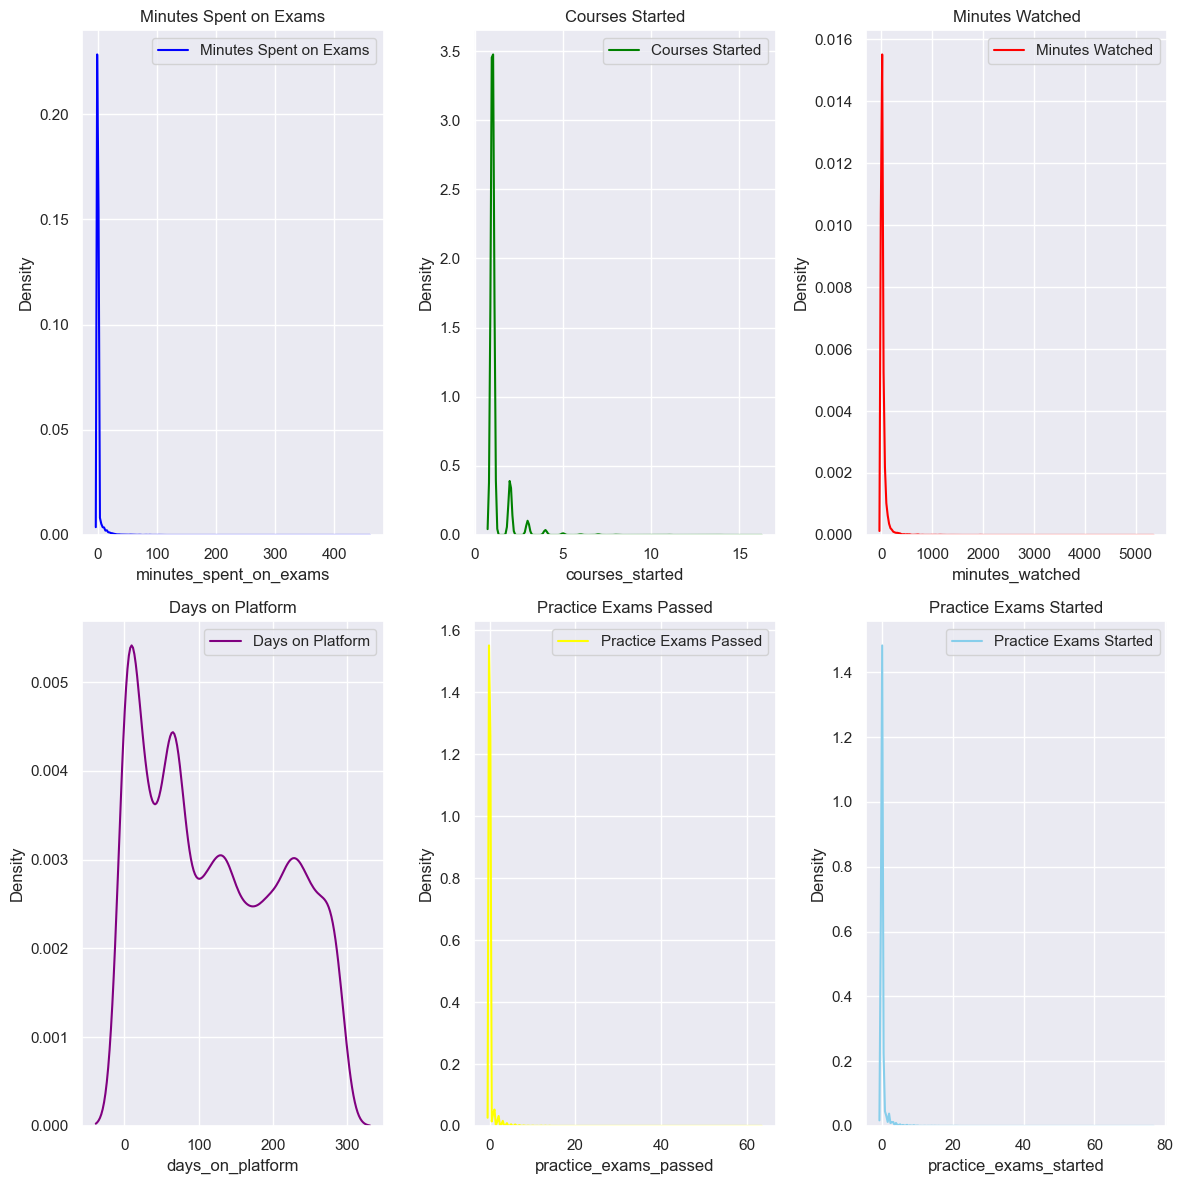

In [8]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 12))

# Plot KDE plots on subplots
sns.kdeplot(data['minutes_spent_on_exams'], ax=axes[0, 0], color='blue', label='Minutes Spent on Exams')
sns.kdeplot(data['courses_started'], ax=axes[0, 1], color='green', label='Courses Started')
sns.kdeplot(data['minutes_watched'], ax=axes[0, 2], color='red', label='Minutes Watched')
sns.kdeplot(data['days_on_platform'], ax=axes[1, 0], color='purple', label='Days on Platform')
sns.kdeplot(data['practice_exams_passed'], ax=axes[1, 1], color='yellow', label='Practice Exams Passed')
sns.kdeplot(data['practice_exams_started'], ax=axes[1, 2], color='skyblue', label='Practice Exams Started')

# Set titles for subplots
axes[0, 0].set_title('Minutes Spent on Exams')
axes[0, 1].set_title('Courses Started')
axes[0, 2].set_title('Minutes Watched')
axes[1, 0].set_title('Days on Platform')
axes[1, 1].set_title('Practice Exams Passed')
axes[1, 2].set_title('Practice Exams Started')

# Add legend to each subplot
for ax in axes.flat:
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


### Removing Outliers

In [9]:
data= data[data['minutes_watched'] <= 1000] ## drop Minutes watched larger than 1,000

In [10]:
data = data[data['courses_started'] <= 10] ## Number of courses surpassing 10

In [11]:
data = data[data['practice_exams_started'] <= 10] ### Number of practice exams started higher than 10

In [12]:
data= data[data['minutes_spent_on_exams'] <= 40] ### Minutes spent on exams going beyond 40 minutes

In [13]:
data_no_outliers = data.copy()

In [14]:
data_no_outliers.shape

(17626, 8)

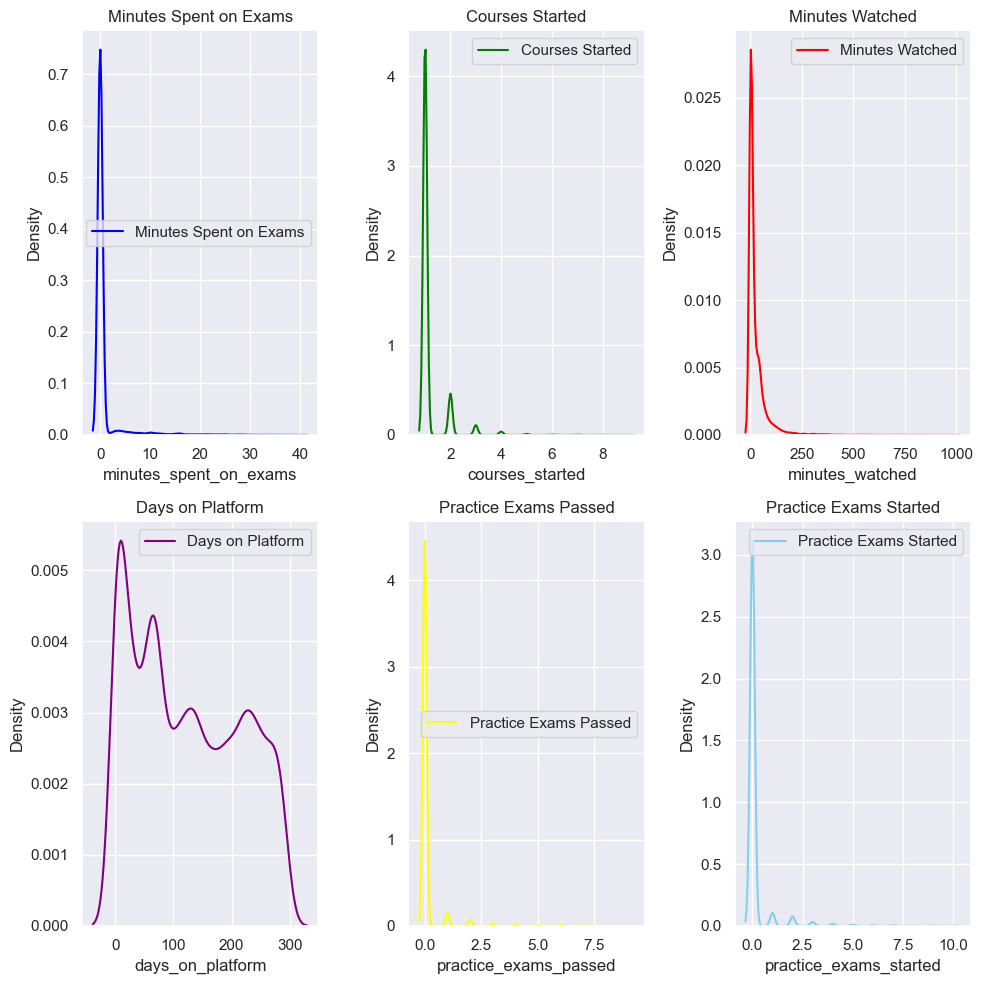

In [15]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 10))

# Plot KDE plots on subplots
sns.kdeplot(data_no_outliers['minutes_spent_on_exams'], ax=axes[0, 0], color='blue', label='Minutes Spent on Exams')
sns.kdeplot(data_no_outliers['courses_started'], ax=axes[0, 1], color='green', label='Courses Started')
sns.kdeplot(data_no_outliers['minutes_watched'], ax=axes[0, 2], color='red', label='Minutes Watched')
sns.kdeplot(data_no_outliers['days_on_platform'], ax=axes[1, 0], color='purple', label='Days on Platform')
sns.kdeplot(data_no_outliers['practice_exams_passed'], ax=axes[1, 1], color='yellow', label='Practice Exams Passed')
sns.kdeplot(data_no_outliers['practice_exams_started'], ax=axes[1, 2], color='skyblue', label='Practice Exams Started')

# Set titles for subplots
axes[0, 0].set_title('Minutes Spent on Exams')
axes[0, 1].set_title('Courses Started')
axes[0, 2].set_title('Minutes Watched')
axes[1, 0].set_title('Days on Platform')
axes[1, 1].set_title('Practice Exams Passed')
axes[1, 2].set_title('Practice Exams Started')

# Add legend to each subplot
for ax in axes.flat:
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [16]:
## create new data frame
new_df = data_no_outliers.copy()
new_df.shape

(17626, 8)

In [17]:
# Reset the index and drop the old index
new_df.reset_index(drop=True, inplace=True)

In [18]:
new_df.describe(include = 'all')

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
count,17618,17626.000000,17626.000000,17626.000000,17626.000000,17626.000000,17626.000000,17626.000000
unique,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,123.454102,27.145342,1.177295,0.183195,0.119029,0.778405,0.092137
std,NaN,90.773394,56.290650,0.559075,0.817034,0.588701,3.476651,0.289227
min,NaN,0.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,41.000000,1.100000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,113.000000,6.700000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,204.000000,33.400000,1.000000,0.000000,0.000000,0.000000,0.000000


### Checking for Multicollinearity

In [19]:
# Select the independent variables for which you want to check multicollinearity
variables = new_df[["days_on_platform", "minutes_watched",
                    "courses_started", "practice_exams_started", 
                    "practice_exams_passed", "minutes_spent_on_exams","purchased"]]

# Add a constant column for the VIF calculation
X = add_constant(variables)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                 Variable       VIF
0                   const  8.369010
1        days_on_platform  1.211302
2         minutes_watched  1.585815
3         courses_started  1.364688
4  practice_exams_started  9.744814
5   practice_exams_passed  7.523045
6  minutes_spent_on_exams  3.196568
7               purchased  1.240166


In [20]:
columns_with_high_VIF = ['practice_exams_started','practice_exams_passed']
data_no_mult = new_df.drop(columns = columns_with_high_VIF, inplace = True)


### Dealing with NaN Values

In [21]:
new_df.isnull()

,student_country,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,purchased
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
17621,False,False,False,False,False,False
17622,False,False,False,False,False,False
17623,False,False,False,False,False,False
17624,False,False,False,False,False,False


In [22]:
new_df.isnull().sum()

student_country           8
days_on_platform          0
minutes_watched           0
courses_started           0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

In [23]:
new_df['student_country'] = new_df['student_country'].fillna('NAM', axis = 0)

In [24]:
new_df

,student_country,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,purchased
0,US,288,358.1,1,15.81,0
1,SG,260,1.7,1,16.00,0
2,TR,260,22.4,1,0.93,0
3,KE,259,18.8,1,14.63,0
4,IN,259,118.0,2,16.48,0
...,...,...,...,...,...,...
17621,EG,0,0.8,1,0.00,0
17622,IN,0,0.1,1,0.00,0
17623,CM,0,7.8,1,0.00,0
17624,CA,0,10.4,1,0.00,0


In [25]:
cleaned_data = new_df.copy()
cleaned_data

,student_country,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,purchased
0,US,288,358.1,1,15.81,0
1,SG,260,1.7,1,16.00,0
2,TR,260,22.4,1,0.93,0
3,KE,259,18.8,1,14.63,0
4,IN,259,118.0,2,16.48,0
...,...,...,...,...,...,...
17621,EG,0,0.8,1,0.00,0
17622,IN,0,0.1,1,0.00,0
17623,CM,0,7.8,1,0.00,0
17624,CA,0,10.4,1,0.00,0


### Splitting the Data

In [26]:
targets = cleaned_data['purchased']
inputs = cleaned_data.drop(['purchased'], axis=1)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.2, random_state = 365)

### Encoding the Data

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


In [29]:
# Initialize the OrdinalEncoder
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=170)

# Fit and transform the encoder on the training data
x_train_encoded = enc.fit_transform(x_train[["student_country"]])

# Create a new column "student_country_enc" in the training data
x_train["student_country_enc"] = x_train_encoded

# Drop the original "student_country" column from the training data
x_train.drop(["student_country"], axis=1, inplace=True)

# Now apply the encoder on the test data (with modification for unknown categories)
x_test_encoded = enc.transform(x_test[["student_country"]])

# Create a new column "student_country_enc" in the test data
x_test["student_country_enc"] = x_test_encoded

# Drop the original "student_country" column from the test data
x_test.drop(["student_country"], axis=1, inplace=True)

# Convert DataFrames to numpy ndarrays
x_train_array = np.asarray(x_train, dtype='float')
x_test_array = np.asarray(x_test, dtype='float')

# Now x_train_array, x_test_array, y_train, and y_test are ready for modeling
print(x_train_array[:5])
print(x_test_array[:5])
print(y_train[:5])
print(y_test[:5])

[[2.49e+02 2.46e+01 1.00e+00 0.00e+00 4.40e+01]
 [4.40e+01 1.00e-01 1.00e+00 0.00e+00 1.54e+02]
 [2.46e+02 4.00e-01 2.00e+00 9.40e+00 1.19e+02]
 [2.90e+01 6.30e+00 1.00e+00 0.00e+00 4.40e+01]
 [7.30e+01 4.54e+01 1.00e+00 3.71e+00 1.08e+02]]
[[ 58.   67.2   1.    0.   67. ]
 [ 14.   36.9   1.    0.  154. ]
 [209.    0.8   1.    0.  110. ]
 [ 38.    1.2   1.    0.  154. ]
 [ 48.   65.4   4.    0.   12. ]]
3729     0
14748    0
343      0
15591    0
447      0
Name: purchased, dtype: int64
14044    0
14786    1
6041     0
14999    0
14573    0
Name: purchased, dtype: int64


# Creating a Random Forests Model

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

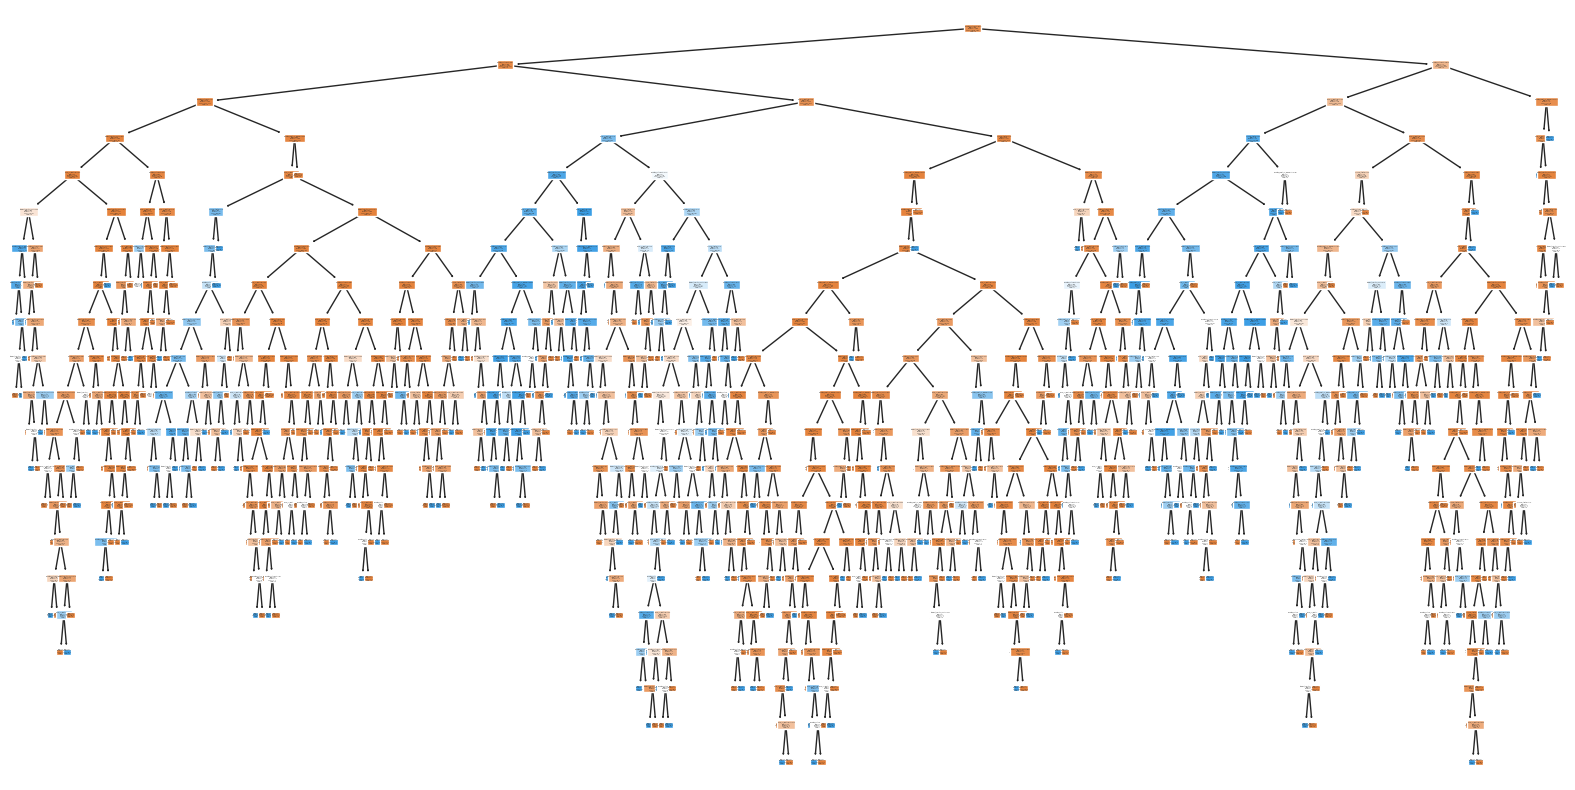

In [65]:
# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=365)

# Fit the classifier on your data
rf_classifier.fit(x_train, y_train)

# Get one of the decision trees from the Random Forest
one_tree = rf_classifier.estimators_[0]

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(one_tree, filled=True, feature_names=x_train.columns, class_names=["0", "1"])
plt.show()

### Testing The Model


In [66]:
y_test_pred = rf_classifier.predict(x_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3183
           1       0.84      0.71      0.77       343

    accuracy                           0.96      3526
   macro avg       0.90      0.85      0.87      3526
weighted avg       0.96      0.96      0.96      3526



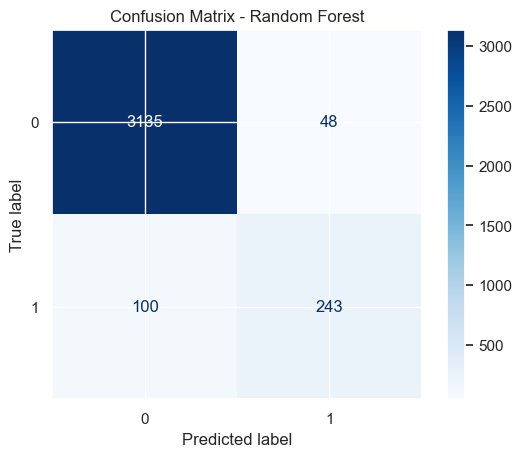

In [67]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=["0", "1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

#### I would like to clarify that not all comments and analysis reports were included in this section of the project due to specific reasons. As a result, it would be inaccurate to consider this version as complete, even though it is a crucial and fundamental component of the project.

#### Thank You Very Much